<img src = "sbml_logo.jpg" width = "680" align = "center">
<img src = "infographic_sbml.jpg" width = "1080" height = "400" align = "center">

***
***

# BE 240 Lecture : 2

## Introduction to SBML
### _Ayush Pandey_


## [SBML](http://sbml.org) is a _"free and open interchange format for computer models of biological processes"_

## 1. SBML uses the language of XML
Even the simplest SBML model file can contain hundreds of lines, full of various XML tags. The header looks like this:
```
<sbml xmlns="http://www.sbml.org/sbml/level2/version3" level="2" metaid="_153818" version="3">
  <model id="BIOMD0000000012" metaid="_000001" name="Elowitz2000 - Repressilator">
```  
**You don't have to write your own SBML files by hand!**


## 2. Software that support SBML : More than 300! 

* Model building tools: [Tellurium](http://tellurium.analogmachine.org/) (Python), [Sub-SBML](https://github.com/BuildACell/subsbml) (Python), [iBioSim](https://async.ece.utah.edu/tools/ibiosim/) (GUI), [MATLAB SimBiology](https://www.mathworks.com/products/simbiology.html)
* Model simulation tools: [bioscrape](https://github.com/biocircuits/bioscrape/) (Python), [COPASI](http://copasi.org/) (GUI), [LibRoadRunner](http://libroadrunner.org/) (Python), [MATLAB SimBiology](https://www.mathworks.com/products/simbiology.html)
* Analysis tools: [bioscrape inference](https://github.com/biocircuits/bioscrape/) (Python), [COPASI](http://copasi.org/) (GUI), [ABC-SysBio](http://www.theosysbio.bio.ic.ac.uk/resources/abc-sysbio/) (Python)

Follow [this link](http://sbml.org/SBML_Software_Guide/SBML_Software_Summary) for detailed descriptions of various software tools that support SBML.


Models in SBML : A big curated model database : [BioModels](https://www.ebi.ac.uk/biomodels/). An example model from this database at the end of this notebook.

## 3. For software developers : SBML API for Python : python-libsbml. 


* Set/change parameter values: `model.getParameter(6).setValue(1e3)` => Changes the value of the 6th parameter in the list of parameters to 1e3.
* Set initial conditions: `model.getSpecies('id').setInitialAmount(50)` => Changes the initial condition of the species with identifier "id" to 50.

and so on...Not easy to directly use python-libsbml - but you shouldn't need to (unless you are developing your own software). 
Refer to the [Documentation](http://sbml.org/Software/libSBML/5.18.0/docs/python-api/) for more information.

***
---

# SBML with bioscrape

## Important : Update your bioscrape installation 
To get the latest changes in bioscrape, run the following from the directory where bioscrape is installed:
```
$ git pull origin master
$ python setup.py install
```
(get the latest code ("pull") from the [bioscrape Github repository](https://github.com/ananswam/bioscrape/) master branch, then install bioscrape again).

We made some bug fixes this week, so it is important that you get the latest version of the package. 

## Simulating a repressilator circuit (using its SBML model)
From [biomodels](https://www.ebi.ac.uk/biomodels/) SBML model repository, we can get the SBML model that accompanies the original repressilator paper [[1]](https://www.nature.com/articles/35002125). We import the SBML file obtained into bioscrape to simulate it. For more information on how to simulate a bioscrape model, refer to [this](http://www.cds.caltech.edu/%7Emurray/courses/be240/sp2020/W2_bioscrape.ipynb) notebook. 

## A quick peek into the SBML model:
Model header: <img src = "repressilator1.jpg" width = "600">
Species: <img src = "repressilator2.jpg" width = "600">

## The ODE model (from [[1]](https://www.nature.com/articles/35002125.pdf)): 
<img src = "repressilator_model.jpg" width = "600">

In the SBML model: PX: lacI protein, PY: TetR protein, PZ: cI protein.

In [17]:
# Import bioscrape simulator and import_sbml from sbmlutil to import SBML files into bioscrape.
from bioscrape.sbmlutil import import_sbml
from bioscrape.simulator import py_simulate_model

# Import the SBML file : Usage : import_sbml('sbml_filename.xml'), returns bioscrape Model object
# (Make sure that the file path is correctly specified wherever the SBML file ending in .xml is present in your directory)
M_represillator = import_sbml('repressilator_sbml.xml')

#Simulate Deterministically and Stochastically
import numpy as np
timepoints = np.linspace(0,700,10000)
result_det = py_simulate_model(timepoints, Model = M_represillator)
result_stoch = py_simulate_model(timepoints, Model = M_represillator, stochastic = True)


In [25]:
# Import relevant settings and packages to create plots
import matplotlib.pyplot as plt
import matplotlib as mpl
color_list = ['r', 'k', 'b','g','y','m','c']
mpl.rc('axes', prop_cycle=(mpl.cycler('color', color_list) ))
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16)
plt.figure(figsize = (10, 4))

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

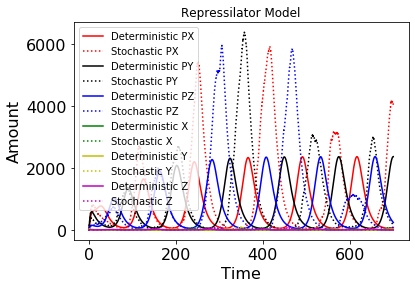

In [26]:
#Plot Results
for i in range(len(M_represillator.get_species_list())):
    s = M_represillator.get_species_list()[i]
    plt.plot(timepoints, result_det[s], color = color_list[i], label = "Deterministic "+s)
    plt.plot(timepoints, result_stoch[s], ":", color = color_list[i], label = "Stochastic "+s)

plt.title('Repressilator Model')
plt.xlabel('Time', FontSize = 16)
plt.ylabel('Amount', FontSize = 16)
plt.legend()
plt.show()

## More examples / assignments:

1. **Try your own SBML model!** 
    * Use `M.write_sbml_model("filename.xml")` to write your bioscrape Model object `M` to a SBML file. Then, load up your SBML model as discussed above using `import_sbml`.
    * If you are interested, use [Tellurium](http://tellurium.analogmachine.org/) or [COPASI](http://copasi.org/) to create a SBML model, then simulate using bioscrape or compare simulations with other libraries.
    * Get a SBML model from one of the repositories online of your favorite paper, then simulate using bioscrape. For example, similar to the repressilator example above, BioModels repository consists SBML models of a 
        * Toggle Switch 
        * Influenza Viral Dynamics Spread 
        * Circadian Oscillator
        * MAPK/ERK pathway
        * Other interesting examples available [here](https://www.ebi.ac.uk/biomodels/content/model-of-the-month?all=yes).
    * Pro Tip : You can directly load an SBML model using the `Model`constructor. Usage : `M = Model(sbml_filename = "sbml_filename.xml")`
 

   
2. Check out the `Saving and Loading SBML and Bioscrape XML.ipynb` notebook for other examples.
3. We will use [BioCRNpyler](https://github.com/BuildACell/biocrnpyler) next week to generate SBML models of commonly used parts and components in biological circuits. The repository already has quite a few generated SBML models.
4. You can write compartmentalized SBML models for your own project as it might help in the future lectures (different SBML files for each compartment).